In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

**Task 1.0**: Load Training and Testing Datasets from CSV files.

The following code is used to load the training and testing datasets from CSV files into pandas DataFrames.

In [2]:
df_X_train = pd.read_csv("/Users/anoop/Downloads/Train_60/Train_60/X_Train_Data_Input.csv")
df_y_train = pd.read_csv("/Users/anoop/Downloads/Train_60/Train_60/Y_Train_Data_Target.csv")
df_X_test = pd.read_csv("/Users/anoop/Downloads/Test_20/Test_20/X_Test_Data_Input.csv")
df_y_test = pd.read_csv("/Users/anoop/Downloads/Test_20/Test_20/Y_Test_Data_Target.csv")

## Fill Missing Values Function

**Task 1.1**: Create a function to handle missing values in the "training dataset".

The approach used here will randomly samples existing non-missing values from the same column and fills the missing entries with these sampled values. This ensures that the imputed values come from the same distribution as the observed data.

In [3]:
def fillMissingValues(columnName):
    
    # Count missing values in the test data
    missing_count = df_X_train[columnName].isnull().sum()
    
    # Randomly sample non-missing values from the column in the test data
    imputed_values = df_X_train[columnName].dropna().sample(missing_count, replace=True, random_state=42)
    
    # Use the missing mask on df_X_train
    df_X_train.loc[df_X_train[columnName].isnull(), columnName] = imputed_values.values
    

**Task 1.2**: Create a function to handle missing values in the "testing dataset".

Similar to the training data imputation function, this method randomly samples non-missing values from the same column and uses them to fill the missing entries in the test data. This ensures that the test data remains as realistic as possible while preserving its statistical distribution.

In [4]:
def fillMissingValuesTestData(columnName):
    
    # Count missing values in the test data
    missing_count = df_X_test[columnName].isnull().sum()

    # Randomly sample non-missing values from the column in the test data
    imputed_values = df_X_test[columnName].dropna().sample(missing_count, replace=True, random_state=42)

    # Use the missing mask on df_X_test
    df_X_test.loc[df_X_test[columnName].isnull(), columnName] = imputed_values.values

**Task 1.3**: Impute missing values for multiple columns in Training and Testing Datasets.

The code given below applies the `fillMissingValues` and `fillMissingValuesTestData` functions to impute missing values across multiple specified columns in both the training (`df_X_train`) and testing (`df_X_test`) datasets.

In [5]:
# Training data
fillMissingValues(columnName="Column0")
fillMissingValues(columnName="Column3")
fillMissingValues(columnName="Column4")
fillMissingValues(columnName="Column5")
fillMissingValues(columnName="Column6")
fillMissingValues(columnName="Column8")
fillMissingValues(columnName="Column9")
fillMissingValues(columnName="Column14")
fillMissingValues(columnName="Column15")

# Testing data
fillMissingValuesTestData(columnName="Column0")
fillMissingValuesTestData(columnName="Column3")
fillMissingValuesTestData(columnName="Column4")
fillMissingValuesTestData(columnName="Column5")
fillMissingValuesTestData(columnName="Column6")
fillMissingValuesTestData(columnName="Column8")
fillMissingValuesTestData(columnName="Column9")
fillMissingValuesTestData(columnName="Column14")
fillMissingValuesTestData(columnName="Column15")

## Split

**Task 1.4**: Prepare feature matrices and target vectors for model training and testing.

In [6]:
features = ["Column0", "Column1", "Column2", "Column3", "Column4", "Column5", "Column6", "Column7", "Column8", "Column9", "Column10", "Column11", "Column12", "Column13", "Column14", "Column15", "Column16", "Column17", "Column18", "Column19", "Column20", "Column21"]
target = "target"

X_train = df_X_train[features]
y_train = df_y_train[target]

X_test = df_X_test[features]
y_test = df_y_test[target]

print("Training Data Feature Matrix Shape: ", X_train.shape)
print("Training Data Target Vector Shape: ", y_train.shape)
print()
print("Testing Data Feature Matrix Shape: ", X_train.shape)
print("Testing Data Target Vector Shape: ", y_train.shape)

Training Data Feature Matrix Shape:  (785133, 22)
Training Data Target Vector Shape:  (785133,)

Testing Data Feature Matrix Shape:  (785133, 22)
Testing Data Target Vector Shape:  (785133,)


## Resample

**Task 1.5**: Handle class imbalance with `RandomOverSampler`.

The code given below applies **Random Oversampling** to balance the target classes in the training data. This technique is used to increase the number of instances in the minority class by randomly duplicating examples from that class until both classes have an equal number of instances. This helps the model learn better from underrepresented classes and avoid bias towards the majority class.

In [7]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
y_train_over.value_counts(normalize=True)

target
0    0.5
1    0.5
Name: proportion, dtype: float64

## Model Building

### Baseline

**Task 1.6**: Calculate Baseline Accuracy.

This code given below calculates the baseline accuracy of the model, which is simply the accuracy a model would achieve if it always predicted the majority class. It serves as a reference point to compare how well the model performs.

In [8]:
baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy: ", round(baseline, 2))

Baseline Accuracy:  0.91


### Iterate

**Task 1.7**: Train a Random Forest Classifier.

This code snippet given below is responsible for training a Random Forest Classifier model. Here, the model is trained using the balanced dataset generated through oversampling, which helps address the class imbalance issue.

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

### Evaluate

**Task 1.8**: Evaluate `model` accuracy.

In [10]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

print("Model Training Accuracy: ", round(acc_train, 2))
print("Model Testing Accuracy: ", round(acc_train, 2))

Model Training Accuracy:  1.0
Model Testing Accuracy:  1.0


**Task 1.9**: Evaluate cross-validation accuracy of the `model`.

This code given below performs cross-validation on the oversampled training data to assess the generalizability of the `model`.

In [11]:
cv_acc_scores = cross_val_score(
    model, X_train_over, y_train_over, cv = 5, n_jobs = -1
)
for score in cv_acc_scores:
    print(round(score,3))

0.988
0.988
0.987
0.988
0.988


Cross-validation shows consistent accuracy across different folds, with scores around **0.988**. This suggests that the model **generalizes well** and is robust across various subsets of the data, reducing the concern of overfitting. The near-perfect cross-validation scores reflect strong model performance, confirming that the classifier maintains its high accuracy across different samples of the training set. 

This also suggests the model is likely to perform similarly well when deployed in real-world scenarios with similar data characteristics.

## Model Metrics

We’ve done a great job with our training and test accuracy—our model has surpassed the baseline, and that’s definitely something to feel good about. We’re moving in the right direction! But let’s not stop there. We want to dig a bit deeper to understand exactly how our model is performing.

**Task 2.0**: Visualize `model` performance with a Confusion Matrix.

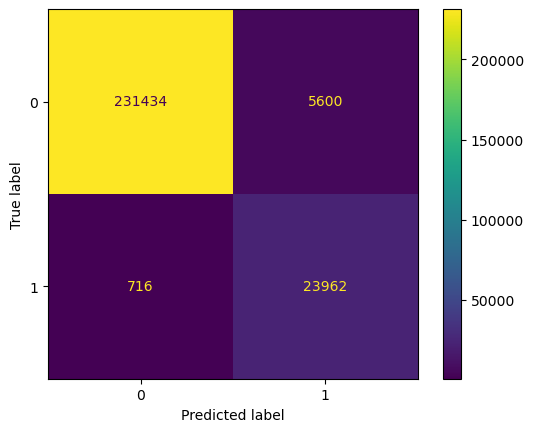

In [12]:
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In the top left corner of the confusion matrix, we have *231,434 true negatives*. These are the cases where our model predicted that the observation belongs to class 0 (negative) and it was correct. On the opposite side, in the bottom right corner, we have *23,962 true positives*. These are the observations that our model predicted as class 1 (positive) and it was correct.

Alright, these are the parts of the grid that we got right. **And the majority of the correct predictions, they come from our true negative, class 0**. Which makes sense that is the balance of this dataset (approx. 0.90% of the total observation belongs to Negative Class 0). 

This is also why we observe a lower number of false negatives (incorrectly predicting class 0) and a higher number of false positives (incorrectly predicting class 1). So we can say that our model works well at identifying the negative class.

**Where we really need to improve is our True Positives**. This model has a hard time picking up those observations that are gonna go Positive Class 1. That is something we need to think about and figure out how we can optimise our model. 

**Task 2.1**: Evaluate `model` performance with a Classificaton Report.

In [13]:
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.81      0.97      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.90      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712



- **Accuracy**: The overall accuracy is 0.98 (98%), meaning the model correctly classified 98% of the test data.

- **Precision**: Precision for class 1 is 0.81, meaning that out of all the instances the model predicted as class 1, 81% were correct. In contrast, class 0 has a perfect precision of 1.00.

- **Recall**: Recall for class 1 is 0.97, meaning the model correctly identified 97% of the actual class 1 instances. This shows that the model is quite good at detecting positive instances (class 1).

- **F1 Score**: F1-score is the harmonic mean of precision and recall. For class 1, an f1-score of 0.88 shows the model strikes a good balance between precision and recall, even though the precision is somewhat lower than the recall.



**Task 2.2**: Plot the ROC curve and calculate AUC.

This task generates a Receiver Operating Characteristic (ROC) curve for the `model`. The ROC curve visualizes the model's performance across various thresholds and is complemented by the Area Under the Curve (AUC), which quantifies the model's ability to distinguish between positive and negative classes.

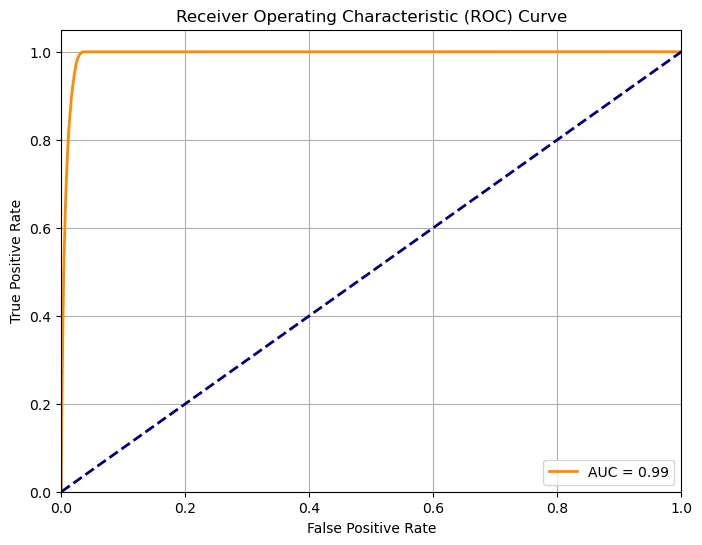

In [14]:
# Predict probabilities for class 1
y_probs = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**What this chart shows**:

- **True Positive Rate (TPR)** (on the y-axis) vs. **False Positive Rate (FPR)** (on the x-axis) at various thresholds.
- The orange curve shows the model’s ability to balance between detecting true positives and limiting false positives.
- The **dashed diagonal line** represents a model with no discrimination ability, essentially random guessing, where the true positive rate equals the false positive rate.
- The **closer the orange curve is to the top-left corner**, the better the model is at distinguishing between the classes.

Our model has a very high AUC score of 0.99, which is impressive. This means that our model is **almost perfect** at distinguishing between our two target classes: class 0 and class 1.



## Optimize the Model for Real-World Use

Our model has a high recall for class 1. However, it's precision is 0.81 for class 1, indicating that it might still misclassify some negative instances as positive. So to get a way to improve this model's performance in the real world we need to understand the **cost of false negatives and false positives** in its context. In other words, optimizing a machine learning model requires a deep understanding of the context in which it will be used. 

Unfortunately, in our case, the dataset we worked with is anonymous and doesn’t provide any additional context. As a result, we’re not able to accurately gauge the cost of a false positive or the cost of a false negative in this particular context.

However, we’ve built flexibility into the model. One of the most effective ways to tune the model to better fit specific business needs is by adjusting the prediction threshold. 

**Task 2.3**: Extract a subset of predictions and their corresponding predicted probabilities from the `model`.

By examining a small sample, we can gain insights into how the model makes decisions and the confidence it has in those predictions. For example, if the model predicts class 1 with a probability of 0.9, we can be quite confident in that prediction. However, if the probability is only 0.5, it suggests that the model is uncertain and that adjusting the prediction threshold may be warranted to optimize for our specific objectives. 

In [15]:
sample_predictions = model.predict(X_test)[15:20]
sample_prob = model.predict_proba(X_test)[15:20, -1]
rounded_probs = [round(prob, 3) for prob in sample_prob]

print("Model Predictions: ", sample_predictions)
print("Prediction Probability: ", rounded_probs)

Model Predictions:  [1 0 1 0 0]
Prediction Probability:  [0.501, 0.0, 1.0, 0.0, 0.003]


**Task 2.4**: Create a dataframe `results_df` to neatly display the model's predictions alongside their corresponding predicted probabilities. 

By organizing the data in this manner, we can facilitate a clearer analysis and presentation of the model's performance on a sample of the test set.

In [16]:
results_df = pd.DataFrame({
    'Model Predictions': sample_predictions,
    'Prediction Probability': rounded_probs
}).set_index("Model Predictions")
results_df

,Prediction Probability
Model Predictions,
1,0.501
0,0.000
1,1.000
0,0.000
0,0.003


In analyzing the `results_df` DataFrame, we observe a crucial rule of thumb: probabilities above 0.5 lead the model to classify an observation as belonging to the positive class, while those below 0.5 are designated as negative. This insight not only sheds light on the model's predictions but also reveals the confidence level behind each decision. For instance, if we choose to adjust our decision threshold to 0.6, the model will classify an observation as positive only if its probability of being positive surpasses this elevated threshold. 

This adjustment allows us to exercise greater control over the predictions, enhancing our ability to minimize false positives while ensuring that we maintain a rigorous standard for what constitutes a positive classification.

In practice, this means we could potentially reduce the number of false positives (classifying a negative observation as positive) by being more selective about what we consider a positive prediction, thus enhancing the model's reliability in critical applications.

**Task 2.5**:  Create a prediction function `make_prediction` with adjustable threshold.

The objective of this function is to generate predictions based on a specified probability threshold. 

In [17]:
def make_prediction(threshold=0.5):

    # Take one observation in the test set
    sample_data = pd.DataFrame(X_test.iloc[15]).T # Convert the first observation to a DataFrame
    
    # Get the predicted probability for class 1
    prob = model.predict_proba(sample_data)[0][1]
    
    # Apply threshold to make a prediction
    if prob > threshold:
        result = "Class 1 (Positive)"
    else:
        result = "Class 0 (Negative)"
    
    return {
        "Prediction": result,
        "Predicted Probability": prob,
        "Threshold": threshold
    }


In real-world applications, we may want to adjust this threshold based on the costs associated with misclassifications. With this `make_prediction` function you can set the threshold level to adjust this model with the context and avoid misclasifications. For example:

- If **false positives** are more costly, we might want to increase the threshold to make the model more conservative.
- If **false negatives** are more costly, we might lower the threshold to catch more positives, even if it increases the chance of false positives.

**Task 2.6**: Use the `make_prediction` function with different threshold values.

By calling the function with thresholds of 0.5 and 0.6, we can observe how changing the threshold impacts the model's predictions. This allows stakeholders to understand the flexibility of the model in managing the trade-off between false positives and false negatives.

In [18]:
# Example usage:
prediction_info = make_prediction(threshold=0.5)
print(prediction_info)

prediction_info = make_prediction(threshold=0.6)
print(prediction_info)

{'Prediction': 'Class 1 (Positive)', 'Predicted Probability': 0.5009425185041944, 'Threshold': 0.5}
{'Prediction': 'Class 0 (Negative)', 'Predicted Probability': 0.5009425185041944, 'Threshold': 0.6}


Now its more flexible! By simply tweaking the threshold to 0.6, we’ve made our model even smarter. This adjustment helps reduce the number of false positives while still capturing true positives. By adjusting this threshold, we’re customizing the model to find the sweet spot where it’s doing the best job at what really matters to us.

## Save the Model

**Task 2.7**: Save the `model` to a pickle file.

This ensures that the model can be easily saved and reused for future predictions without having to retrain it.

In [19]:
import joblib
joblib.dump(model, "gstn_predictive_model.pkl")

['gstn_predictive_model.pkl']

***
## Citation and Plagiarism Declaration
*Libraries Used*

- *Scikit-learn - [Copyright (c) 2007-2024 The scikit-learn developers. All rights reserved](https://github.com/scikit-learn/scikit-learn?tab=BSD-3-Clause-1-ov-file).*
- *Pandas - [Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team All rights reserved](https://github.com/pandas-dev/pandas?tab=BSD-3-Clause-1-ov-file).*
- *Joblib - [Copyright (c) 2008-2021, The joblib developers. All rights reserved](https://github.com/joblib/joblib?tab=BSD-3-Clause-1-ov-file).*
- *[Matplotlib](https://matplotlib.org/stable/project/license.html).*
- *Seaborn* - [Copyright (c) 2012-2023, Michael L. Waskom All rights reserved](https://github.com/mwaskom/seaborn?tab=BSD-3-Clause-1-ov-file).
- *Imbalanced-learn* - [Copyright (c) 2014-2020 The imbalanced-learn developers. All rights reserved](https://github.com/scikit-learn-contrib/imbalanced-learn?tab=MIT-1-ov-file).

*Plagiarism Declaration*

- *We know that plagiarism means taking and using the ideas, writings, works or inventions of another as if they were one’s own. We know that plagiarism not only includes verbatim copying, but also the extensive use of another person’s ideas without proper acknowledgement. We know that plagiarism covers this sort of use of material found in textual sources and from the Internet.*

- *We acknowledge and understand that plagiarism is wrong*.

- *We understand that my research must be accurately referenced. I have followed the rules and conventions concerning referencing, citation.*

- *This project is my own work, or my group’s own unique group project. We acknowledge that copying someone else’s assignment, or part of it, is wrong, and that submitting identical work to others constitutes a form of plagiarism.*

- *We have not allowed, nor will we in the future allow, anyone to copy this work with the intention of passing it off as their own work.*

*By submitting this project we (Sreelal S and Anoop Kumar U) acknowledge this Plagiarism Declaration*